In [1]:
import numpy as np
import math as m
from copy import copy
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
def create_object(vertices, facecolor=[0.5,0.5,0.5], edgecolor=[0,0,0]):
    obj = Poly3DCollection(vertices, linewidths=1, alpha=0.2)
    obj.set_facecolor(facecolor)
    obj.set_edgecolor(edgecolor)
    return obj

In [3]:
def get_plots(objs):
    plt.ion()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for obj in objs:
        ax.add_collection3d(copy(obj))
    s = [-2,-2,-2,2,2,2]
    ax.auto_scale_xyz(s,s,s)
    return ax, fig

# Rotations and translations

## Exercise 1

#### Question
Considering a vector v = [0,0,5], what is the difference between:
\
1] first translating v, followed by a rotation
\
2] first rotating v, followed by a translation

#### Hypothesised answer:
By translating v, you move each coordinate by some translation T, then you are rotating the translated coordinates, about some origin point. When you are rotating the points, the vector is first rotated, before being translated. Since, there is no prior transformation before the rotation, we can presume final vector *may be in a different position to the first set of operations.

#### Test

In [4]:
T = np.array([0,0,2])
R = np.array([[-1,0,0],[0,1,0],[0,0,-1]])

corners = [[-1,0.5,0.5], [+1,0.5,0.5], [0,-0.5,0.5], [0,0.5,-0.5]]

face1 = [ corners[0], corners[1], corners[2] ] 
face2 = [ corners[0], corners[1], corners[3] ] 
face3 = [ corners[0], corners[2], corners[3] ] 
face4 = [ corners[1], corners[2], corners[3] ] 

verts = np.array([face1,face2,face3,face4],dtype=float)

verts

array([[[-1. ,  0.5,  0.5],
        [ 1. ,  0.5,  0.5],
        [ 0. , -0.5,  0.5]],

       [[-1. ,  0.5,  0.5],
        [ 1. ,  0.5,  0.5],
        [ 0. ,  0.5, -0.5]],

       [[-1. ,  0.5,  0.5],
        [ 0. , -0.5,  0.5],
        [ 0. ,  0.5, -0.5]],

       [[ 1. ,  0.5,  0.5],
        [ 0. , -0.5,  0.5],
        [ 0. ,  0.5, -0.5]]])

In [5]:
# Translations
v_TR = np.matmul((verts + T), R)
v_RT = np.matmul(verts, R) + T

In [6]:
objs = [
    create_object(verts, facecolor=[0.5,0.5,1]),
    create_object(v_TR, facecolor=[0.5,1,0.5]),
    create_object(v_RT, facecolor=[1,0.5,0.5])
]

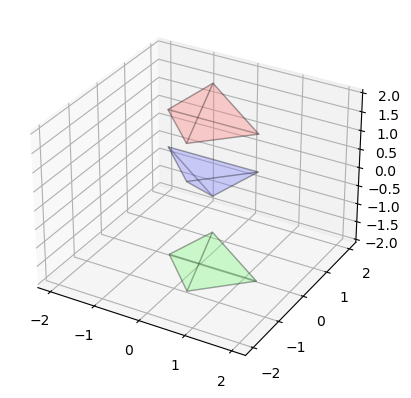

In [7]:
ax, fig = get_plots(objs)

## Exercise 2

In [8]:
sqrt2 = np.sqrt(2)/2
R1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
R2 = np.array([[sqrt2,-sqrt2,0],[sqrt2,sqrt2,0],[0,0,1]])
R3 = np.array([[sqrt2,sqrt2,0],[sqrt2,-sqrt2,0],[0,0,1]])
R4 = np.array([[sqrt2,0,-sqrt2],[0,1,0],[sqrt2,0,sqrt2]])
R5 = np.array([[1,0,0],[0,0,1],[0,1,0]])
R6 = np.array([[0,1,0],[1,0,0],[0,0,1]])
R7 = np.array([[2,0,0],[0,2,0],[0,0,2]])
R8 = np.array([[0,2,0],[2,0,0],[0,0,2]])
R9 = np.array([[1/3,0,0],[0,1/3,0],[0,0,1/3]])
R10 = np.matmul(R2,R4)

R = [R1,R2,R3,R4,R5,R6,R7,R8,R9,R10]

T = np.array([2,0,0])

In [9]:
corners = [[-0.5,-0.5,-0.5],[0.5,-0.5,-0.5],[0.5,0.5,-0.5],[-0.5,0.5,-0.5],[0,1,0]]
face1 = [corners[0], corners[1], corners[4]]
face2 = [corners[0], corners[3], corners[4]]
face3 = [corners[1], corners[2], corners[4]]
face4 = [corners[2], corners[3], corners[4]]
face5 = [corners[0], corners[1], corners[2]]
face6 = [corners[0], corners[2], corners[3]]

v = np.array([face1, face2, face3, face4, face5, face6])

v

array([[[-0.5, -0.5, -0.5],
        [ 0.5, -0.5, -0.5],
        [ 0. ,  1. ,  0. ]],

       [[-0.5, -0.5, -0.5],
        [-0.5,  0.5, -0.5],
        [ 0. ,  1. ,  0. ]],

       [[ 0.5, -0.5, -0.5],
        [ 0.5,  0.5, -0.5],
        [ 0. ,  1. ,  0. ]],

       [[ 0.5,  0.5, -0.5],
        [-0.5,  0.5, -0.5],
        [ 0. ,  1. ,  0. ]],

       [[-0.5, -0.5, -0.5],
        [ 0.5, -0.5, -0.5],
        [ 0.5,  0.5, -0.5]],

       [[-0.5, -0.5, -0.5],
        [ 0.5,  0.5, -0.5],
        [-0.5,  0.5, -0.5]]])

In [10]:
obj= create_object(v, [0.4,0.1,0.6])

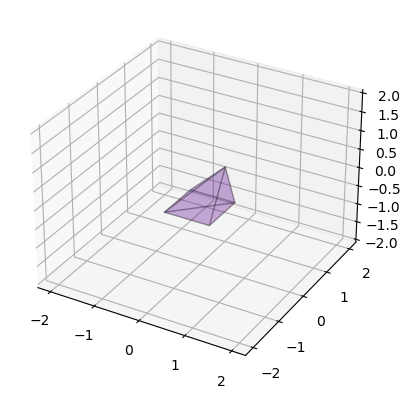

In [11]:
ax, fig = get_plots([obj])

R0
det:  1.0
Orthonormal: True


R1
det:  1.0
Orthonormal: True


R2
det:  -1.0
Orthonormal: True


R3
det:  1.0
Orthonormal: True


R4
det:  -1.0
Orthonormal: True


R5
det:  -1.0
Orthonormal: True


R6
det:  7.999999999999998
Orthonormal: False


R7
det:  -7.999999999999998
Orthonormal: False


R8
det:  0.037037037037037035
Orthonormal: False


R9
det:  1.0000000000000004
Orthonormal: True




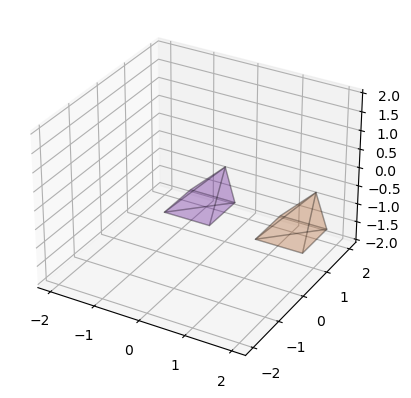

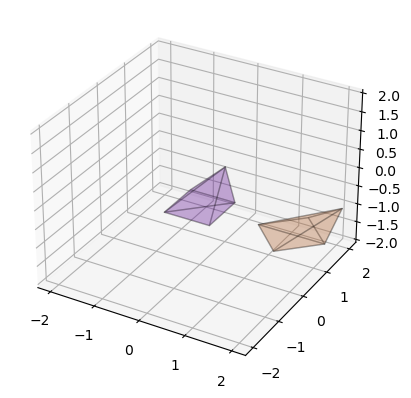

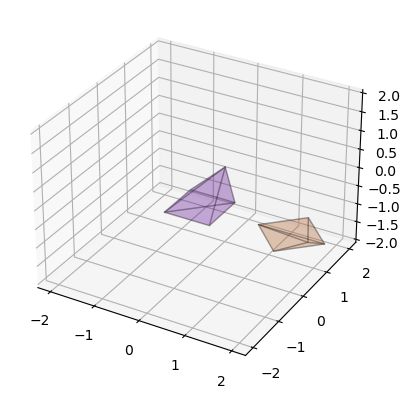

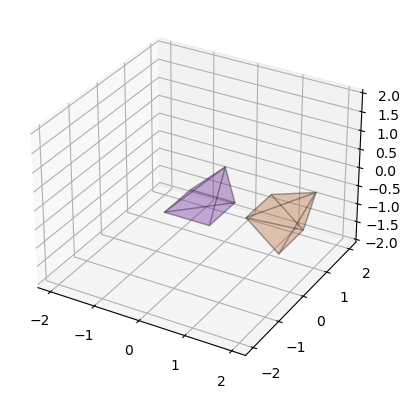

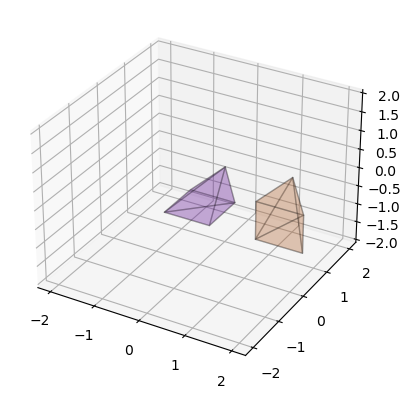

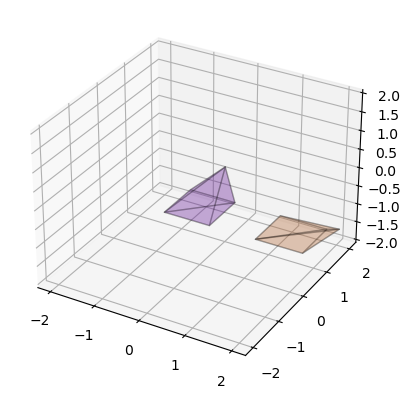

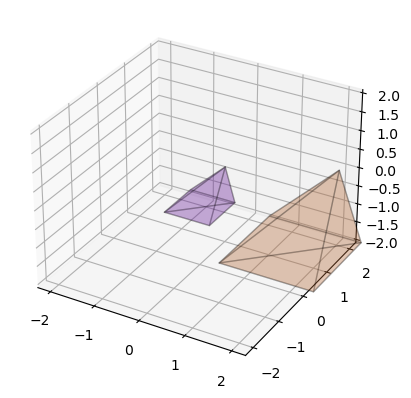

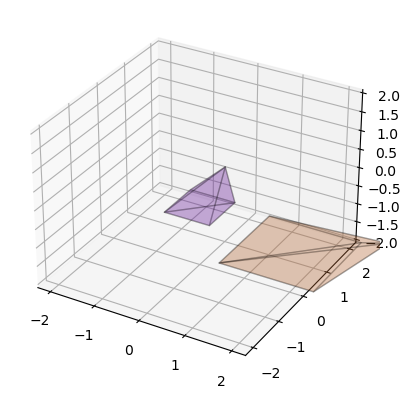

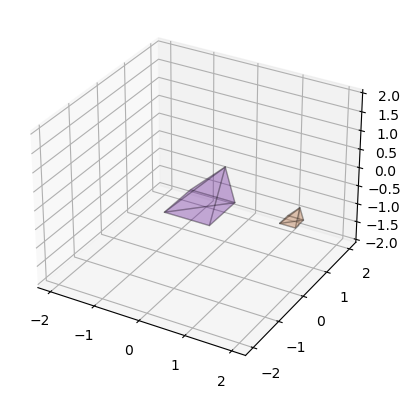

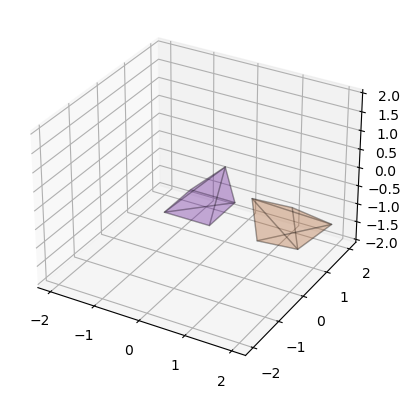

In [12]:
I = np.array([[1,0,0],[0,1,0],[0,0,1]])
for i in range(len(R)):
    print('R{}'.format(i))
    print('det: ', np.linalg.det(R[i]))
    ortho = np.dot(R[i], np.transpose(R[i])).astype(int)
    comparison = ortho == I
    orthonormal = False
    if(comparison.all()):
        orthonormal = True
    print('Orthonormal: {}'.format(orthonormal))
    print('\n')
    obj1 = create_object(np.matmul(v, R[i]) + T, [0.7,0.4,0.2])
    ax, fig = get_plots([obj, obj1])

# Homogenous Coordinates

## Exercise 3

In [17]:
b = [1,1,0]
c= [0,1,1]

In [18]:
H1 = np.matmul(verts, R2) + b
H2 = np.matmul(verts, R4) + c

In [19]:
objs = [create_object(H1, [0.5,0.3,0.7]), create_object(H2, [0.4,0.8,0.2]), create_object(verts, [0.5,0.5,0.5])]

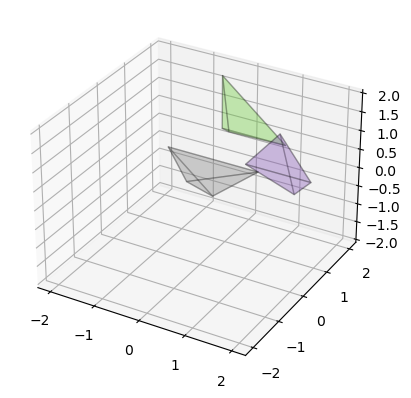

In [20]:
ax, fig = get_plots(objs)

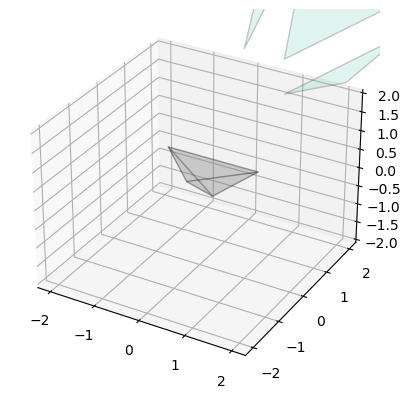

In [24]:
H = np.matmul(H1,H2)
ax, fig = get_plots([create_object(verts, [0.5,0.5,0.5]), create_object(H, [0.4,0.8,0.7])])

In [ ]:
Hp = np.matmul(H2,H1)
ax, fig = get_plots([create_object(verts, [0.5,0.5,0.5]), create_object(H, [0.4,0.8,0.7])])